<a href="https://colab.research.google.com/github/alahirajeffrey/transfer_learning_using_mobilenet/blob/main/image_classification_using_mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
#check to see if gpu is available

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


### Get images file from google drive

In [13]:
from google.colab import drive

In [17]:
#connect to google drive and set root path
drive.mount('/content/gdrive', force_remount=True)
ROOT_PATH = 'gdrive/My Drive/ML/images/'

Mounted at /content/gdrive


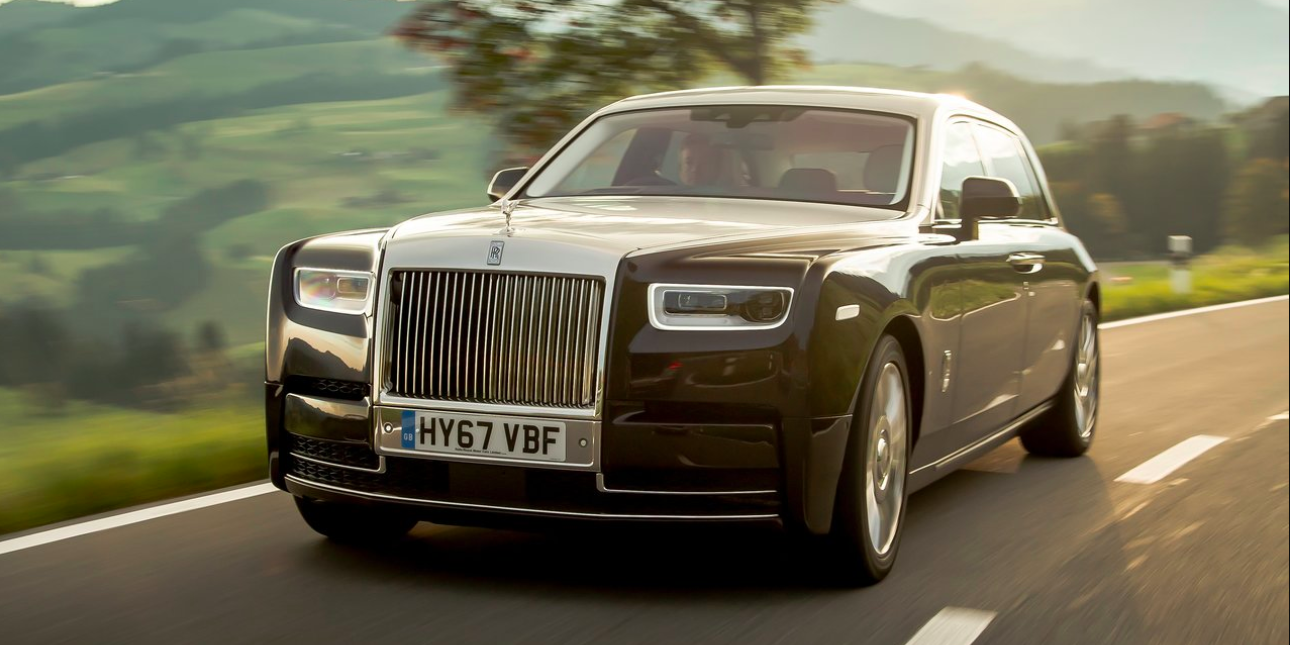

In [19]:
#check sample image from root path
from IPython.display import Image
Image(filename= ROOT_PATH + 'car.png', width=300,height=300) 

### Modeling

In [20]:
#download copy of mobilenet model
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [27]:
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
import numpy as np

In [28]:
def prepare_image(file_name):
  """"
  function to process image data for use with mobilenet
  """
  img_path = ROOT_PATH
  img = image.load_img(img_path + file_name, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array_expanded_dims = np.expand_dims(img_array, axis=0)
  
  return preprocess_input(img_array_expanded_dims)

### Predictions

In [33]:
from keras.applications import imagenet_utils

In [61]:
def predict_class(processed_image):
  """
  function to process file and 
  """
  prediction = mobile.predict(processed_image)

  results = imagenet_utils.decode_predictions(prediction)
  print(results)

In [62]:
processed_car_image = prepare_image('car.png')
predict_class(processed_car_image)

[[('n04461696', 'tow_truck', 0.46195188), ('n03930630', 'pickup', 0.37671316), ('n03459775', 'grille', 0.09332765), ('n02974003', 'car_wheel', 0.019209981), ('n03100240', 'convertible', 0.014609611)]]


Lolz. The mobilenet model predicted that the bentley was a tow_truck with 46% certainty whith a pickup being the next prediction with the a probability of about 38. Not a very good prediction but it did get the fact that it was a vehicle 

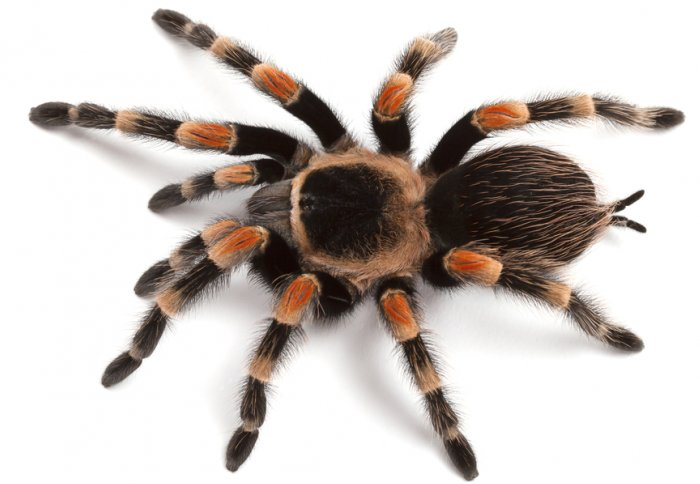

In [63]:
Image(filename= ROOT_PATH + 'spider.jpg', width=300,height=300)

In [64]:
#make prediction of spider class
processed_spider_image = prepare_image('spider.jpg')
predict_class(processed_spider_image)

[[('n01774750', 'tarantula', 0.9996755), ('n01773549', 'barn_spider', 0.00026704473), ('n01776313', 'tick', 4.6154462e-05), ('n01773797', 'garden_spider', 7.8882995e-06), ('n01775062', 'wolf_spider', 2.1061408e-06)]]


Mobilenet predicted the image to be tarantula spider with over 99% accuracy. I do not know if this is specifically a tarantula spider but one thing i am sure is that this is a spider so it is a very good prediction

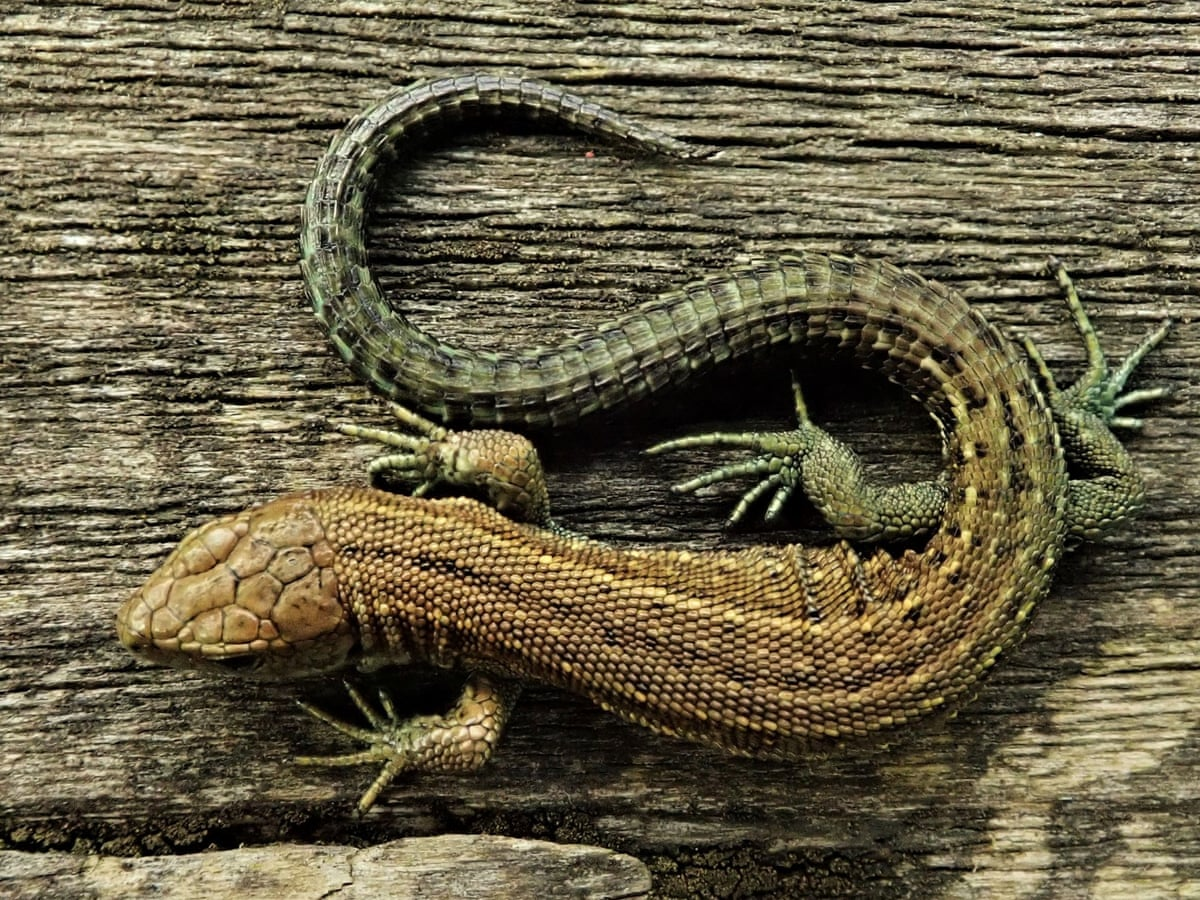

In [65]:
Image(filename= ROOT_PATH + 'lizard.jpg', width=300,height=300)

In [67]:
#prepare image and mke prediction
processed_lizard_image = prepare_image('lizard.jpg')
predict_class(processed_lizard_image)

[[('n01689811', 'alligator_lizard', 0.5806207), ('n01630670', 'common_newt', 0.19795077), ('n01685808', 'whiptail', 0.05662996), ('n01756291', 'sidewinder', 0.027503388), ('n01631663', 'eft', 0.023575451)]]


Mobilenet predicted this to be an alligator lizard with about 58% probability. I half expected it to predict a snake or something like that.

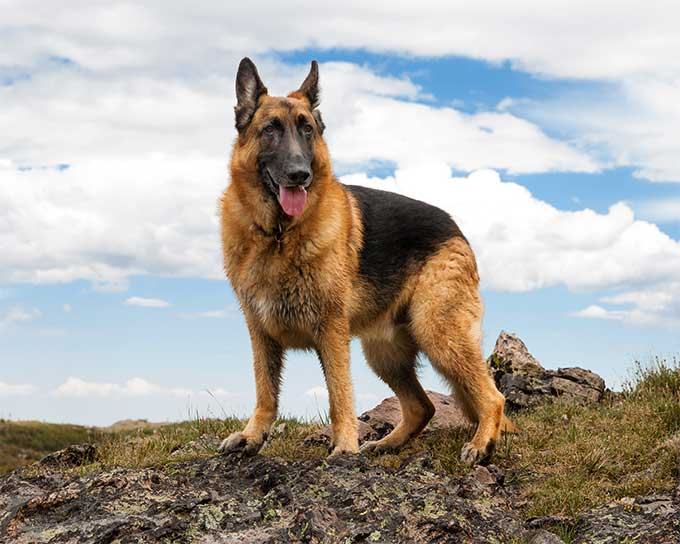

In [66]:
Image(filename= ROOT_PATH + 'german shepherd.jpg', width=300,height=300)

In [68]:
#make prediction of spider class
processed_dog_image = prepare_image('german shepherd.jpg')
predict_class(processed_dog_image)

[[('n02106662', 'German_shepherd', 0.8227635), ('n02105162', 'malinois', 0.16620605), ('n02093754', 'Border_terrier', 0.0026722606), ('n02093991', 'Irish_terrier', 0.0024468082), ('n02114367', 'timber_wolf', 0.0014540612)]]


Not only did mobilenet correctly predict that it was a dog but it also correctly predicted the breed of the dog